In [33]:
import pandas as pd

# Load datasets
books = pd.read_csv('books.csv')
books_new = pd.read_csv('books_new.csv')



In [34]:
print("Books Dataset:\n", books.head())


Books Dataset:
                       Title            Author              Genre  Height  \
0  Fundamentals of Wavelets  Goswami, Jaideva  signal_processing     228   
1                Data Smart     Foreman, John       data_science     235   
2  God Created the Integers  Hawking, Stephen        mathematics     197   
3         Superfreakonomics   Dubner, Stephen          economics     179   
4               Orientalism      Said, Edward            history     197   

       Publisher  
0          Wiley  
1          Wiley  
2        Penguin  
3  HarperCollins  
4        Penguin  


In [36]:
print("Books New Dataset:\n", books_new.head())

Books New Dataset:
                       Title            Author       Genre           SubGenre  \
0  Fundamentals of Wavelets  Goswami, Jaideva        tech  signal_processing   
1                Data Smart     Foreman, John        tech       data_science   
2  God Created the Integers  Hawking, Stephen        tech        mathematics   
3         Superfreakonomics   Dubner, Stephen     science          economics   
4               Orientalism      Said, Edward  nonfiction            history   

   Height      Publisher  
0     228          Wiley  
1     235          Wiley  
2     197        Penguin  
3     179  HarperCollins  
4     197        Penguin  


In [39]:
# Aligning columns and merging datasets
books_new = books_new[['Title', 'Author', 'Genre', 'Height', 'Publisher']]
books_combined = pd.concat([books, books_new], ignore_index=True)
books_combined.drop_duplicates(inplace=True)

In [40]:
# Checking for missing values
print("\nMissing values:\n", books_combined.isnull().sum())

# Filling missing values if any
books_combined.fillna('', inplace=True)

print("\nData Info:\n", books_combined.info())


Missing values:
 Title          0
Author        42
Genre          0
Height         0
Publisher    142
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 418
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      306 non-null    object
 1   Author     306 non-null    object
 2   Genre      306 non-null    object
 3   Height     306 non-null    int64 
 4   Publisher  306 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.3+ KB

Data Info:
 None


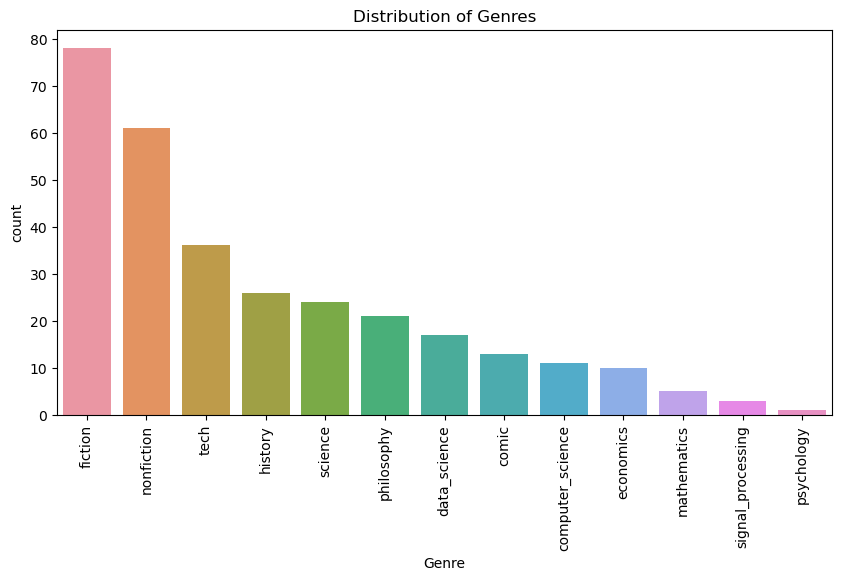

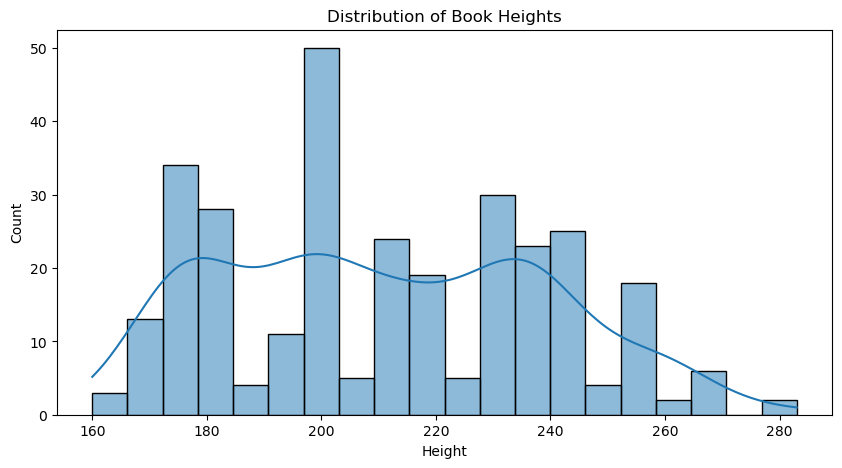

In [42]:
#Exploratory Data Analysis(EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of genres
plt.figure(figsize=(10, 5))
sns.countplot(data=books_combined, x='Genre', order=books_combined['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Genres')
plt.show()

# Height distribution
plt.figure(figsize=(10, 5))
sns.histplot(books_combined['Height'], bins=20, kde=True)
plt.title('Distribution of Book Heights')
plt.show()


In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Author', 'Genre', 'Publisher']:
    le = LabelEncoder()
    books_combined[column] = le.fit_transform(books_combined[column])
    label_encoders[column] = le

print("\nEncoded Data:\n", books_combined.head())



Encoded Data:
                       Title  Author  Genre  Height  Publisher
0  Fundamentals of Wavelets      51     11     228         32
1                Data Smart      41      2     235         32
2  God Created the Integers      57      6     197         20
3         Superfreakonomics      31      3     179         10
4               Orientalism     102      5     197         20


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between books
features = ['Author', 'Genre', 'Height', 'Publisher']
cosine_sim = cosine_similarity(books_combined[features])

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between books
features = ['Author', 'Genre', 'Height', 'Publisher']
cosine_sim = cosine_similarity(books_combined[features])

# Function to get book recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = books_combined[books_combined['Title'] == title].index[0]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return books_combined['Title'].iloc[book_indices]

# Example usage
recommended_books = get_recommendations('Data Smart')
print("\nRecommended Books:\n", recommended_books)



Recommended Books:
 98                  Age of Discontuinity, The
28      Complete Sherlock Holmes, The - Vol I
29     Complete Sherlock Holmes, The - Vol II
94                 New Markets & Other Essays
54                             Dylan on Dylan
309                 Age of Discontuinity, The
64                       Crime and Punishment
43                               Freakonomics
212                                Data Smart
45                   Story of Philosophy, The
Name: Title, dtype: object


In [53]:
import pickle

# Save the model
with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# Load the model
with open('cosine_sim.pkl', 'rb') as f:
    loaded_cosine_sim = pickle.load(f)
